In [17]:
#mnist
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
print(train_images.dtype)

uint8


In [20]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

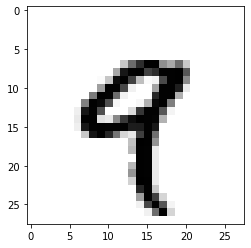

In [7]:
digit=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [4]:
# 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax')) #10개의 확률점수가 들어있는 배열, 2번째 Dense

In [5]:
#컴파일
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [6]:
#이미지 데이터 준비
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [7]:
#레이블 준비
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.2538 - accuracy: 0.9265
Epoch 2/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.1039 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0685 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9856 ETA: 1s - loss: 0.0484 - ac - 8s 131us/step - loss: 0.0494 - accuracy: 0.9856
Epoch 5/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.0369 - accuracy: 0.9889


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 47us/step


In [10]:
print('test_acc:',test_acc)

test_acc: 0.9811000227928162


In [1]:
#영화
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.
C:\Users\User\anaconda3\envs\ai\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\User\anaconda3\envs\ai\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


train_labels와 test_labels는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트이다

In [2]:
train_labels[0:]

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

리스트를 텐서로 바꾸는 방법
* 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length)크기의 정수텐서로 변환한다. 그 다음 이 정수텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용한다

* 리스트를 원 핫 인코딩(one-hot encoding)해서 0과 1의 벡터로 변환한다. 예를 들어 시퀀스[3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10000차원의 벡터로 각각 변환한 후 부동소수 벡터데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용한다

In [5]:
#데이터 원 핫 벡터로 만들기(두번째 방식)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):

        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
#옵티마이저 설정
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

* 손실함수: 훈련데이터에서 신경망의 성능을 측정하는 방식으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와줌
* 옵티마이저: 입력된 데이터와 손실함수를 기반으로 네트워크를 업데이트하는 메커니즘

In [10]:
#손실과 측정을 함수 객체로 지정
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [11]:
#훈련 검증-검증 세트준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

전체 훈련 데이터에 수행되는 각 반복을 에포크(epoch)라고 한다

In [12]:
# 모델 훈련
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 338us/step - loss: 0.5160 - acc: 0.7847 - val_loss: 0.3876 - val_acc: 0.8727
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.3061 - acc: 0.9019 - val_loss: 0.3101 - val_acc: 0.8818
Epoch 3/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2210 - acc: 0.9289 - val_loss: 0.2905 - val_acc: 0.8839
Epoch 4/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1763 - acc: 0.9399 - val_loss: 0.2948 - val_acc: 0.8801
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1436 - acc: 0.9541 - val_loss: 0.2950 - val_acc: 0.8835
Epoch 6/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1160 - acc: 0.9661 - val_loss: 0.3543 - val_acc: 0.8642
Epoch 7/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0961 - acc: 0.9712 - val_loss: 0.3118 - 

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<function matplotlib.pyplot.show(close=None, block=None)>

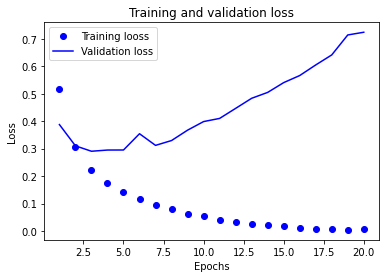

In [14]:
#훈련과 검증손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

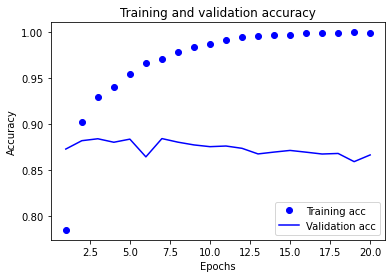

In [15]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화하기
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

훈련 손실은 에포크마다 감소, 훈련 정확도는 에포크마다 증가, 4번째 에포크에서 그래프 역전=>과대적합(훈련 세트 이외의 데이터에는 부적합)

In [16]:
# 모델 처음부터 다시 훈련하기(4번의 에포크 동안)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4860 - accuracy: 0.8187
Epoch 2/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.2817 - accuracy: 0.9051
Epoch 3/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2129 - accuracy: 0.9248
Epoch 4/4
25000/25000 [==============================] - 7s 263us/step


In [32]:
results

[0.30811139752388, 0.878600001335144]

In [17]:
model.predict(x_test)

array([[0.132142  ],
       [0.9999827 ],
       [0.9103702 ],
       ...,
       [0.12876593],
       [0.07367615],
       [0.47078443]], dtype=float32)

3.4.6 추가실험

In [17]:
#은닉층 한개 사용
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data = (x_val, y_val))
results = model.evaluate(x_test, y_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 403
Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.4371 - acc: 0.8340 - val_loss: 0.2938 - val_acc: 0.9112
Epoch 2/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2714 - acc: 0.9071 - val_loss: 0.2188 - val_acc: 0.9319
Epoch 3/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.2160 - acc: 0.9256 - val_loss: 0.1834 - val_acc: 0.9421
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<function matplotlib.pyplot.show(close=None, block=None)>

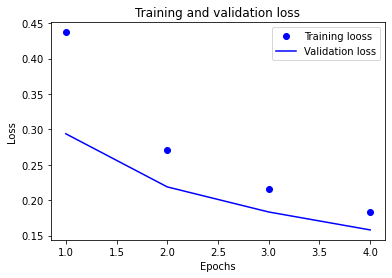

In [19]:
#훈련과 검증손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

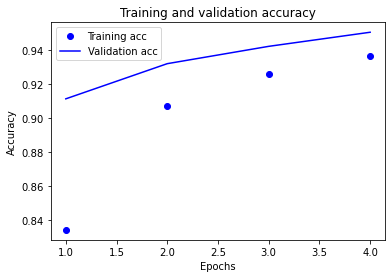

In [20]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화하기
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [19]:
#유닛 64개
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data = (x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 140us/step - loss: 0.4187 - accuracy: 0.8178 - val_loss: 0.2288 - val_accuracy: 0.9244
Epoch 2/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2366 - accuracy: 0.9097 - val_loss: 0.1588 - val_accuracy: 0.9474
Epoch 3/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.1836 - accuracy: 0.9312 - val_loss: 0.1157 - val_accuracy: 0.9655
Epoch 4/4
25000/25000 [==============================] - 3s 105us/step


In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

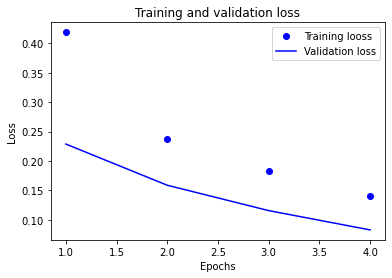

In [21]:
#훈련과 검증손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

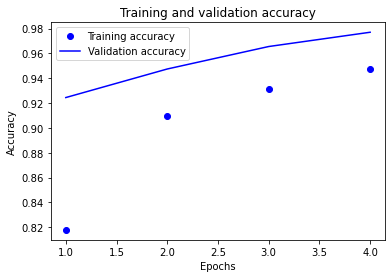

In [23]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화하기
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [10]:
# binary_crossentrophy 대신 mse사용
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.1476 - accuracy: 0.8258 - val_loss: 0.0843 - val_accuracy: 0.9153
Epoch 2/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.0780 - accuracy: 0.9108 - val_loss: 0.0571 - val_accuracy: 0.9392
Epoch 3/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.0590 - accuracy: 0.9308 - val_loss: 0.0424 - val_accuracy: 0.9554
Epoch 4/4
25000/25000 [==============================] - 3s 102us/step


In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

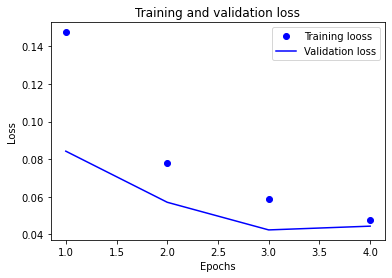

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

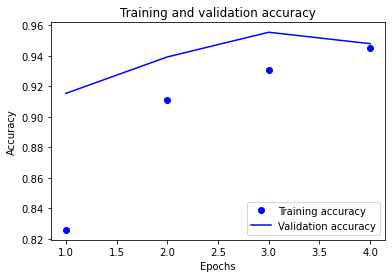

In [13]:
plt.clf() # 그래프 초기화하기
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [17]:
#relu 대신 tanh활성화 함수 써보기
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 8s 304us/step - loss: 0.4285 - accuracy: 0.8320 - val_loss: 0.2634 - val_accuracy: 0.9128
Epoch 2/4
25000/25000 [==============================] - 4s 144us/step - loss: 0.2379 - accuracy: 0.9116 - val_loss: 0.1699 - val_accuracy: 0.9443
Epoch 3/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.1792 - accuracy: 0.9332 - val_loss: 0.1345 - val_accuracy: 0.9556
Epoch 4/4
25000/25000 [==============================] - 3s 115us/step


relu와 같은 활성화 함수(혹은 비선형성이라고도 부름)가 없다면 Dense층은 선형적 연산인 점곱 혹은 덧셈 두개로 구성됨. 그러므로 이 층은 입력에 대한 선형 변환만을 학습할 수 있고 선형 층을 깊게 쌓아도 여전히 하나의 선형 연산이기에 여러 층을 구성하는 장점이 없음(가설공간 확장 없음). 그러므로 가설공간을 풍부히 만들어 층을 깊게 만드는 장점을 살리기 위해 활성화 함수를 추가함. 대표적으로 가장 많이 쓰는 relu가 있고 prelu, elu등도 있음

<function matplotlib.pyplot.show(close=None, block=None)>

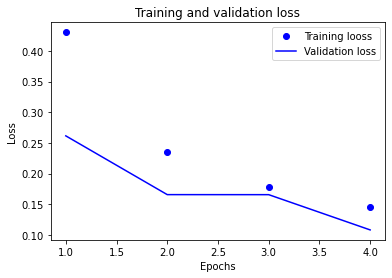

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

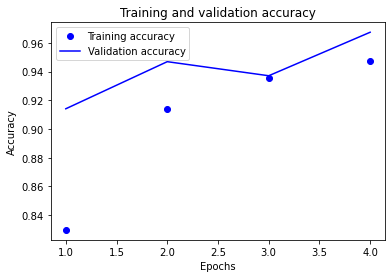

In [14]:
plt.clf() # 그래프 초기화하기
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

# 뉴스 기사 분류: 다중분류

In [24]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.
C:\Users\User\anaconda3\envs\ai\lib\site-packages\keras\datasets\reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\User\anaconda3\envs\ai\lib\site-packages\keras\datasets\reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [25]:
#로이터 데이터셋 턱스트로 디코딩하기(imdb와 유사)
word_index = reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i - 3,'?')for i in train_data[0]])

In [26]:
#데이터 인코딩하기(데이터를 벡터로 변환)(데이터 원 핫 인코딩으로 만들기)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [28]:
#모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # Dense 층 크기 46, 각 입력 샘플에 대해 46차원의 벡터 출력, softmax: mnist에서 본 것과 같이 46개 출력 클래스에 대한 확률 분포를 출력

* categorical_crossentrophy: 손실함수로 이 함수는 두 확률 분포 사이의 거리를 측정한다. 여기에서는 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리이다. 두 분포 사이의 거리를 최소화할 시 진짜 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게 됨

In [29]:
#모델 컴파일
model.compile(optimizer='rmsprop', #옵티마이저
              loss='categorical_crossentropy', #손실함수
              metrics=['accuracy'])

In [30]:
#훈련 검증-검증 세트 준비하기
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [31]:
#모델 훈련하기
history=model.fit(partial_x_train, 
                  partial_y_train, 
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 170us/step - loss: 2.7394 - accuracy: 0.5168 - val_loss: 1.7888 - val_accuracy: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.4220 - accuracy: 0.7174 - val_loss: 1.3145 - val_accuracy: 0.7220
Epoch 3/20
7982/7982 [==============================] - 1s 170us/step - loss: 1.0405 - accuracy: 0.7858 - val_loss: 1.1425 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.8166 - accuracy: 0.8257 - val_loss: 1.0387 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.6517 - accuracy: 0.8621 - val_loss: 0.9772 - val_accuracy: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.5171 - accuracy: 0.8899 - val_loss: 0.9310 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 171us/step - loss

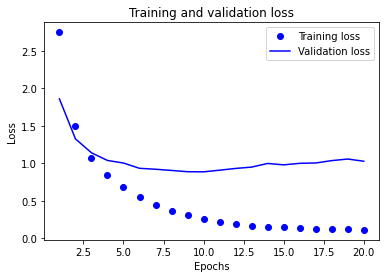

In [9]:
#훈련 검증과 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

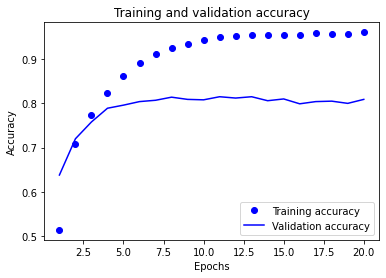

In [10]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

9번째 이후로 과대적합이 시작됨

In [11]:
#모델 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 165us/step - loss: 2.7433 - accuracy: 0.5390 - val_loss: 1.8183 - val_accuracy: 0.6230
Epoch 2/9
7982/7982 [==============================] - 1s 169us/step - loss: 1.4614 - accuracy: 0.7030 - val_loss: 1.3460 - val_accuracy: 0.6860
Epoch 3/9
7982/7982 [==============================] - 1s 174us/step - loss: 1.0626 - accuracy: 0.7715 - val_loss: 1.1487 - val_accuracy: 0.7560
Epoch 4/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.8379 - accuracy: 0.8188 - val_loss: 1.0559 - val_accuracy: 0.7700
Epoch 5/9
7982/7982 [==============================] - 2s 200us/step - loss: 0.6772 - accuracy: 0.8539 - val_loss: 1.0024 - val_accuracy: 0.7870
Epoch 6/9
7982/7982 [==============================] - 2s 211us/step - loss: 0.5457 - accuracy: 0.8851 - val_loss: 0.9627 - val_accuracy: 0.7960
Epoch 7/9
7982/7982 [==============================] - 2s 190us/step - loss: 0.446

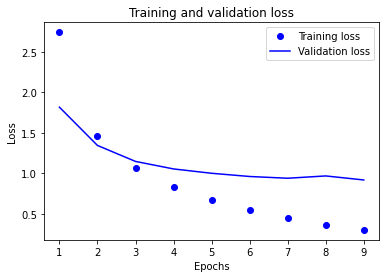

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

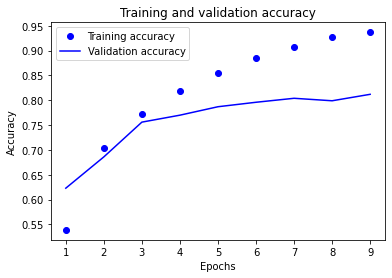

In [13]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
results

[0.9942178910901689, 0.7898486256599426]

대략 79%정도의 정확도, 균형잡힌 이전문제에서 완전 무작위로 분류시 50%, 불균형한 데이터셋에서 무작위로 분류시 18%정도의 정확도를 가짐=> 위 예제는 불균형 데이터셋에서의 무작위 분류

In [27]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.19056099732858414

In [28]:
#새로운 데이터에 대해 예측하기
predictions = model.predict(x_test) 

모델 인스턴스의 predict 메서드는 46개의 토픽에 대한 확률분포를 반환함

In [29]:
predictions[0].shape

(46,)

In [30]:
np.sum(predictions[0])

1.0000001

In [31]:
np.argmax(predictions[0])

3

앞서 말했듯 레이블 인코딩 하는 법은 1. 원 핫 인코딩, 2. 정수 텐서로 변환

* 이 방식에서는 손실함수 하나만 바꾸면 된다=> sparse_categorical_crossentropy(categorical_crossentropy는 레이블이 범주형 인코딩되있을것이라고 가정하고 사용된다. 그러므로, 정수 레이블을 사용할 때에는 sparse_categorical_crossentropy를 이용)

In [32]:
#정수 텐서로 변환해서 인코딩하기
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

마지막 출력이 46차원이기에 중간층의 히든 유닛이 46개 보다 많이 적어서는 않됨

In [33]:
# 46차원보다 훨씬 작은 중간층(4차원)을 둘 때 정보의 병목(시스템 성능이나 용량 제한)이 나타나는 방식
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 212us/step - loss: 3.5262 - accuracy: 0.3271 - val_loss: 3.2261 - val_accuracy: 0.3800
Epoch 2/9
7982/7982 [==============================] - 2s 239us/step - loss: 2.9521 - accuracy: 0.3936 - val_loss: 2.7647 - val_accuracy: 0.4150
Epoch 3/9
7982/7982 [==============================] - 2s 259us/step - loss: 2.5224 - accuracy: 0.4322 - val_loss: 2.4545 - val_accuracy: 0.4390
Epoch 4/9
7982/7982 [==============================] - 2s 224us/step - loss: 2.2366 - accuracy: 0.4562 - val_loss: 2.2625 - val_accuracy: 0.4390
Epoch 5/9
7982/7982 [==============================] - 2s 215us/step - loss: 2.0321 - accuracy: 0.4683 - val_loss: 2.1076 - val_accuracy: 0.4550
Epoch 6/9
7982/7982 [==============================] - 2s 199us/step - loss: 1.8555 - accuracy: 0.4805 - val_loss: 1.9632 - val_accuracy: 0.4670
Epoch 7/9
7982/7982 [==============================] - 2s 210us/step - loss: 1.670

In [34]:
results

[1.5325334040267278, 0.6616206765174866]

정확도가 12%정도 확연히 감소함. 손실의 원인은 주로 정보를 중간층의 저차원표현으로 압축하려 했기 때문에 일어난 현상. 필요한 정보 대부분을 4차원 표현 안에 구겨넣으려 했으나 전부 넣지는 못함

# 추가실험

In [14]:
# 32개의 유닛
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 166us/step - loss: 3.0647 - accuracy: 0.4833 - val_loss: 2.3208 - val_accuracy: 0.5700
Epoch 2/9
7982/7982 [==============================] - 1s 174us/step - loss: 1.9343 - accuracy: 0.6304 - val_loss: 1.6940 - val_accuracy: 0.6410
Epoch 3/9
7982/7982 [==============================] - 2s 222us/step - loss: 1.4317 - accuracy: 0.6922 - val_loss: 1.4120 - val_accuracy: 0.6860
Epoch 4/9
7982/7982 [==============================] - 3s 432us/step - loss: 1.1626 - accuracy: 0.7410 - val_loss: 1.2587 - val_accuracy: 0.7200
Epoch 5/9
7982/7982 [==============================] - 3s 424us/step - loss: 0.9793 - accuracy: 0.7828 - val_loss: 1.1925 - val_accuracy: 0.7430
Epoch 6/9
7982/7982 [==============================] - 2s 312us/step - loss: 0.8409 - accuracy: 0.8161 - val_loss: 1.1093 - val_accuracy: 0.7610
Epoch 7/9
7982/7982 [==============================] - 2s 294us/step - loss: 0.726

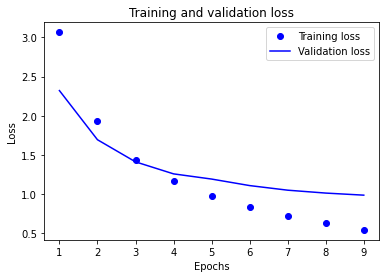

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

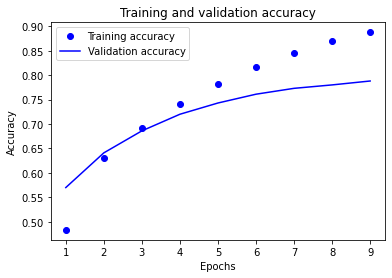

In [16]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
#1개의 은닉층 사용
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 107us/step - loss: 2.9276 - accuracy: 0.5291 - val_loss: 2.2887 - val_accuracy: 0.6100
Epoch 2/9
7982/7982 [==============================] - 1s 103us/step - loss: 1.9134 - accuracy: 0.6734 - val_loss: 1.7214 - val_accuracy: 0.6640
Epoch 3/9
7982/7982 [==============================] - 1s 112us/step - loss: 1.4458 - accuracy: 0.7241 - val_loss: 1.4186 - val_accuracy: 0.7080
Epoch 4/9
7982/7982 [==============================] - 1s 112us/step - loss: 1.1653 - accuracy: 0.7663 - val_loss: 1.2419 - val_accuracy: 0.7390
Epoch 5/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.9736 - accuracy: 0.8021 - val_loss: 1.1260 - val_accuracy: 0.7690
Epoch 6/9
7982/7982 [==============================] - 1s 110us/step - loss: 0.8307 - accuracy: 0.8326 - val_loss: 1.0499 - val_accuracy: 0.7920
Epoch 7/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.717